# vim-emu evaluation

Based on SONATA D5.4, generates inputs for D6.3.

* startup / setup times
* memory consuption



In [65]:
# global settings
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.interpolate import griddata
import numpy as np
import seaborn as sns
import pandas as pd

In [66]:
sns.set_style("darkgrid")
sns.set_context({"figure.figsize": (10, 5)})

## Scaling Experiment

Start emulator platform with diffrent number of PoPs for `line`, `star`, and `mesh` topology.

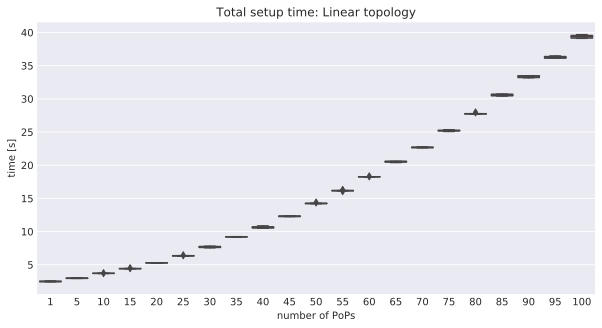

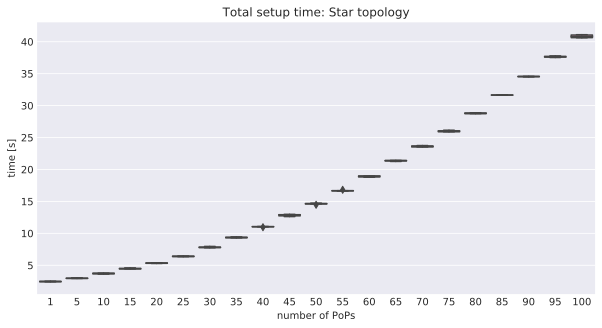

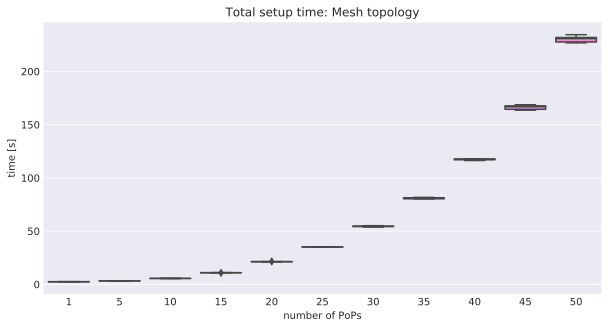

In [67]:
# read results
df = pd.read_pickle("data/2017-12-05-scaling_experiment.pkl")
#print(df)
df_line = df[df["topology"] == "line"]
df_star = df[df["topology"] == "star"]
df_mesh = df[df["topology"] == "mesh"]

#df_line = df_line.groupby(["n_pops"]).mean()
#print(df_line)

def box_plot(d, x="n_pops", y="time_total", title="title", path="plots/boxplot.png"):
    plt.figure()
    ax = sns.boxplot(data=d, x="n_pops", y="time_total")
    ax.set_title(title)
    ax.set_xlabel("number of PoPs")
    ax.set_ylabel("time [s]")
    fig = ax.get_figure()
    fig.savefig(path, dpi=300)
    
box_plot(df_line, title="Total setup time: Linear topology", path="plots/boxplot_total_line.png")
box_plot(df_star, title="Total setup time: Star topology", path="plots/boxplot_total_star.png")
box_plot(df_mesh, title="Total setup time: Mesh topology", path="plots/boxplot_total_mesh.png")



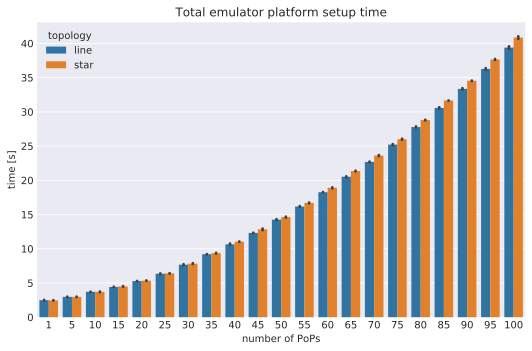

In [68]:
dff = df[df["topology"] != "mesh"].copy()
ax = sns.factorplot(x='n_pops',
                    y='time_total',
                    hue='topology',
                    data=dff,
                    kind="bar",
                    legend_out=False,
                    size=5.0,
                    aspect=1.5)
ax.set_xlabels("number of PoPs")
ax.set_ylabels("time [s]")
plt.title("Total emulator platform setup time")
plt.tight_layout()
ax.savefig("plots/startup_compare_line_star.png", dpi=300)

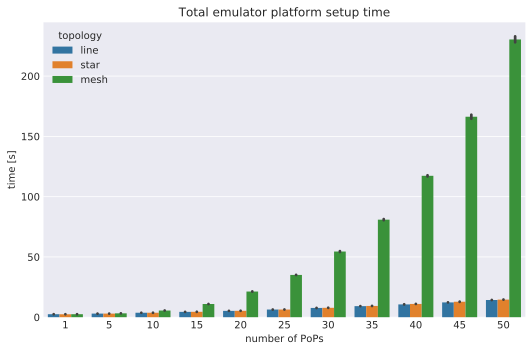

In [69]:
dff = df[df["n_pops"] < 51].copy()
ax = sns.factorplot(x='n_pops',
                    y='time_total',
                    hue='topology',
                    data=dff,
                    kind="bar",
                    legend_out=False,
                    size=5.0,
                    aspect=1.5)
ax.set_xlabels("number of PoPs")
ax.set_ylabels("time [s]")
plt.title("Total emulator platform setup time")
plt.tight_layout()
ax.savefig("plots/startup_compare_mesh.png", dpi=300)

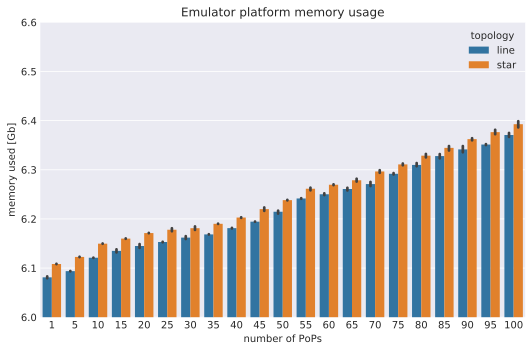

In [70]:
dff = df[df["topology"] != "mesh"].copy()
dff["mem_used"] = dff["mem_used"].map(lambda x: x / (1024 * 1024 * 1024))
#min_mem = dff["mem_used"].min() - 0.1
#dff["mem_used"] -= min_mem
ax = sns.factorplot(x='n_pops',
                    y='mem_used',
                    hue='topology',
                    data=dff,
                    kind="bar",
                    legend_out=False,
                    size=5.0,
                    aspect=1.5)
ax.set_xlabels("number of PoPs")
ax.set_ylabels("memory used [Gb]")
ax.set(ylim=(6, 6.6))
plt.title("Emulator platform memory usage")
plt.tight_layout()
ax.savefig("plots/mem_compare_line_star.png", dpi=300)

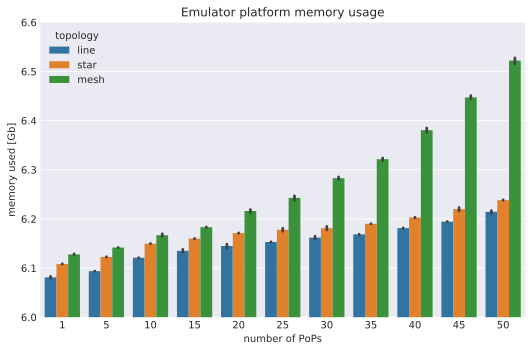

In [71]:
dff = df[df["n_pops"] < 51].copy()
dff["mem_used"] = dff["mem_used"].map(lambda x: x / (1024 * 1024 * 1024))
#min_mem = dff["mem_used"].min() - 0.1
#dff["mem_used"] -= min_mem
ax = sns.factorplot(x='n_pops',
                    y='mem_used',
                    hue='topology',
                    data=dff,
                    kind="bar",
                    legend_out=False,
                    size=5.0,
                    aspect=1.5)
ax.set_xlabels("number of PoPs")
ax.set_ylabels("memory used [Gb]")
ax.set(ylim=(6, 6.6))
plt.title("Emulator platform memory usage")
plt.tight_layout()
ax.savefig("plots/mem_compare_line_star.png", dpi=300)

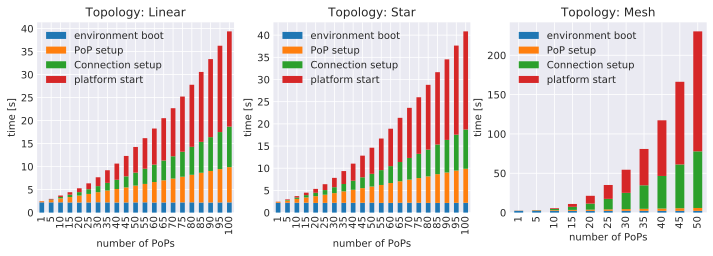

In [100]:
lbl_env_boot = "environment boot"
lbl_pop_create = "PoP setup"
lbl_link_create = "Connection setup"
lbl_topo_start = "platform start"

dff = df.rename(columns={"time_env_boot": lbl_env_boot,
                        "time_pop_create": lbl_pop_create,
                        "time_link_create": lbl_link_create,
                        "time_topo_start": lbl_topo_start})
df_line = dff[dff["topology"] == "line"].groupby(["n_pops"]).mean()
df_line = df_line[[lbl_env_boot, lbl_pop_create, lbl_link_create, lbl_topo_start]]
df_star = dff[dff["topology"] == "star"].groupby(["n_pops"]).mean()
df_star = df_star[[lbl_env_boot, lbl_pop_create, lbl_link_create, lbl_topo_start]]
df_mesh = dff[dff["topology"] == "mesh"].groupby(["n_pops"]).mean()
df_mesh = df_mesh[[lbl_env_boot, lbl_pop_create, lbl_link_create, lbl_topo_start]]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False)
f.set_size_inches(12, 3.5)
df_line.plot.bar(ax=ax1, stacked=True)
df_star.plot.bar(ax=ax2, stacked=True)
df_mesh.plot.bar(ax=ax3, stacked=True)
ax1.set_xlabel("number of PoPs")
ax2.set_xlabel("number of PoPs")
ax3.set_xlabel("number of PoPs")
ax1.set_ylabel("time [s]")
ax2.set_ylabel("time [s]")
ax3.set_ylabel("time [s]")
ax1.set_title("Topology: Linear")
ax2.set_title("Topology: Star")
ax3.set_title("Topology: Mesh")

f.savefig("plots/startup_breakdown.png", dpi=300)

## TODO

- ~~Total setuptime (line, star mesh)~~
- ~~Memory usage~~
- Setup time breakdown
- Total setuptime TopologyZoo
